In [20]:
import pandas as pd     
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [21]:
pd.set_option('display.max_columns', 500)

In [22]:
data= pd.read_csv("Telco.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


## EXPLANATORY DATA ANALYSİS

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
data["Churn"]=data["Churn"].map({"Yes":1, "No":0})

In [30]:
data.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

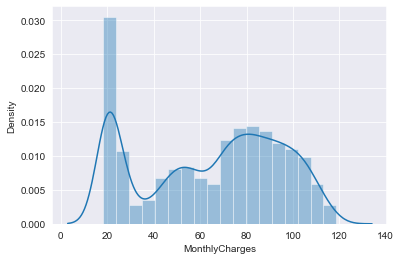

In [31]:
sns.set_style("darkgrid")
sns.distplot(data["MonthlyCharges"])

In [32]:
data.groupby(["gender","Churn"])["MonthlyCharges"].mean()

gender  Churn
Female  0        61.664908
        1        74.812087
Male    0        60.876914
        1        74.066989
Name: MonthlyCharges, dtype: float64

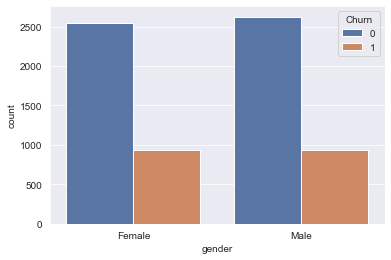

In [33]:
sns.countplot("gender", data = data, hue = "Churn", palette = "deep")

In [34]:
data.drop("customerID",axis=1,inplace=True)

# Total Charges

In [43]:
data[data["TotalCharges"]==" "].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [44]:
data["TotalCharges"] = data["TotalCharges"].apply(lambda x: x.strip() if " " in x else x)

In [45]:
data["TotalCharges"] = data["TotalCharges"].apply(lambda x: x.strip() if x=="" in x else x)

In [46]:
data.drop(data[data["TotalCharges"]==""].index,axis=0,inplace=True)
data.drop(data[data["TotalCharges"]==" "].index,axis=0,inplace=True)

In [53]:
data["TotalCharges"]= data["TotalCharges"].astype("float")

In [54]:
data["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [55]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [56]:
df=data

### GENDER

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [58]:
data = pd.get_dummies(data,columns=["gender"])
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1,0
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0,1
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0,1
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0,1
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1,0


In [59]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1,0
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0,1
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0,1
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0,1
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1,0


## Contract

In [60]:
data.Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [61]:
data["Contract"]=data["Contract"].map({"Month-to-month":1,"Two year":24,"One year":12})

In [62]:
data["Contract"]=data["Contract"].map({1:"Month-to-month",24:"Two year",12:"One year"})

In [63]:
data = pd.get_dummies(data,columns=["Contract"])

# Dummies

In [64]:
data = pd.get_dummies(data,columns=["Partner","Dependents","PhoneService","OnlineSecurity"
,"OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling"])

## Multiple Lines

In [65]:
data["MultipleLines"].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [66]:
data = pd.get_dummies(data,columns=["MultipleLines"])

# InternetService

In [67]:
data["InternetService"].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [68]:
data = pd.get_dummies(data,columns=["InternetService"])

# payment method

In [69]:
data["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [70]:
data = pd.get_dummies(data,columns=["PaymentMethod"])

In [71]:
data.sample(20)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7029,1,6,44.40,263.05,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0
4219,0,48,75.15,3772.65,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
5052,0,18,45.65,747.20,0,0,1,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0
892,1,32,81.10,2619.25,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0
5320,0,37,61.45,2302.35,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0
5327,0,30,19.70,599.25,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1
5217,0,10,24.50,270.15,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
3483,0,18,77.80,1358.60,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
194,0,59,19.30,1192.70,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0
1089,0,16,74.75,1129.35,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   uint8  
 6   gender_Male                              7032 non-null   uint8  
 7   Contract_Month-to-month                  7032 non-null   uint8  
 8   Contract_One year                        7032 non-null   uint8  
 9   Contract_Two year                        7032 non-null   uint8  
 10  Partner_No                               7032 no

In [117]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [120]:
clf = LazyClassifier(verbose=0, ignore_warnings = True,custom_metric=None)
train,test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:08<00:00,  3.35it/s]


In [121]:
train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.69,0.73,0.73,0.71,0.02
QuadraticDiscriminantAnalysis,0.75,0.72,0.72,0.76,0.02
GaussianNB,0.78,0.70,0.70,0.77,0.03
BernoulliNB,0.76,0.68,0.68,0.76,0.03
LinearDiscriminantAnalysis,0.78,0.68,0.68,0.77,0.06
AdaBoostClassifier,0.79,0.68,0.68,0.77,0.28
LGBMClassifier,0.78,0.68,0.68,0.77,0.14
CalibratedClassifierCV,0.78,0.68,0.68,0.77,0.24
LabelPropagation,0.78,0.68,0.68,0.77,1.58


In [122]:
test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.69,0.73,0.73,0.71,0.02
QuadraticDiscriminantAnalysis,0.75,0.72,0.72,0.76,0.02
GaussianNB,0.78,0.70,0.70,0.77,0.03
BernoulliNB,0.76,0.68,0.68,0.76,0.03
LinearDiscriminantAnalysis,0.78,0.68,0.68,0.77,0.06
AdaBoostClassifier,0.79,0.68,0.68,0.77,0.28
LGBMClassifier,0.78,0.68,0.68,0.77,0.14
CalibratedClassifierCV,0.78,0.68,0.68,0.77,0.24
LabelPropagation,0.78,0.68,0.68,0.77,1.58


# DATA PREPROCESSİNG

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [77]:
X=data.drop(["Churn"], axis=1)
y=data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

# Deep Learning

In [127]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout


model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [128]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [129]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
176/176 [==============================] - 1s 3ms/step - loss: 17.8192 - accuracy: 0.6827 - val_loss: 0.5526 - val_accuracy: 0.7541
Epoch 2/600
176/176 [==============================] - 0s 2ms/step - loss: 0.7996 - accuracy: 0.7308 - val_loss: 0.6194 - val_accuracy: 0.7861
Epoch 3/600
176/176 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.7648 - val_loss: 0.4371 - val_accuracy: 0.7910
Epoch 4/600
176/176 [==============================] - 0s 2ms/step - loss: 0.8629 - accuracy: 0.7491 - val_loss: 0.4272 - val_accuracy: 0.7918
Epoch 5/600
176/176 [==============================] - 0s 2ms/step - loss: 0.5898 - accuracy: 0.7758 - val_loss: 0.5695 - val_accuracy: 0.7889
Epoch 6/600
176/176 [==============================] - 0s 2ms/step - loss: 0.8357 - accuracy: 0.7556 - val_loss: 1.2294 - val_accuracy: 0.7818
Epoch 7/600
176/176 [==============================] - 0s 2ms/step - loss: 0.7542 - accuracy: 0.7670 - val_loss: 0.4617 - val_accuracy: 0.791

In [131]:
predictions = model.predict_classes(X_test)

In [132]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.63      0.58      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.79      0.80      0.79      1407



## Logistic


In [78]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)

In [79]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.74      1407
weighted avg       0.79      0.80      0.80      1407



In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model, X_test, y_test, cv=10)
print('Cross-Validation Accuracy Scores', scores.mean())

Cross-Validation Accuracy Scores 0.7911043566362717


In [50]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[912, 121],
       [160, 214]], dtype=int64)

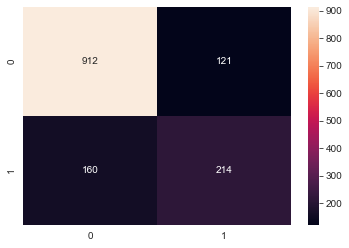

In [51]:
sns.heatmap(cnf_matrix,annot=True,fmt="d")

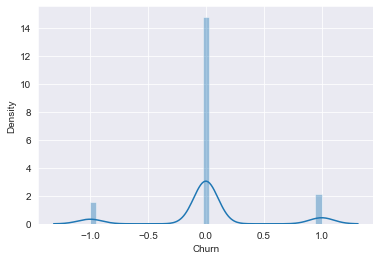

In [52]:
sns.distplot(y_test-y_pred)

In [53]:
log_model.coef_.shape

(1, 45)

In [54]:
compare = pd.DataFrame({"actual":y_test,"prediction":y_pred,"Diff":y_test-y_pred})
compare

,actual,prediction,Diff
974,0,0,0
619,0,1,-1
4289,0,0,0
3721,1,0,1
4533,0,0,0
...,...,...,...
4829,0,0,0
5176,0,0,0
2750,0,0,0
4432,0,0,0


# RFE

In [82]:
selector = RFE(log_model, n_features_to_select=5, step=5)
selector = selector.fit(X, y)


In [85]:
selector.support_

array([False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False])

In [86]:
features = []
for i in list(enumerate(selector.support_.tolist())):
    if i[1] == True:
        features.append(i[0])
features

X.columns[features]

Index(['Contract_Month-to-month', 'Contract_Two year', 'OnlineSecurity_No',
       'InternetService_Fiber optic', 'PaymentMethod_Electronic check'],
      dtype='object')

In [87]:
features

[6, 8, 15, 39, 43]

In [89]:
data.columns[features]

Index(['gender_Male', 'Contract_One year', 'PhoneService_Yes',
       'InternetService_DSL', 'PaymentMethod_Credit card (automatic)'],
      dtype='object')

In [90]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


# Data Preprocessing RFE

In [102]:
df

,gender,Contract,PhoneService,InternetService,PaymentMethod,tenure
0,Female,Month-to-month,No,DSL,Electronic check,1
1,Male,One year,Yes,DSL,Mailed check,34
2,Male,Month-to-month,Yes,DSL,Mailed check,2
3,Male,One year,No,DSL,Bank transfer,45
4,Female,Month-to-month,Yes,Fiber optic,Electronic check,2
...,...,...,...,...,...,...
7038,Male,One year,Yes,DSL,Mailed check,24
7039,Female,One year,Yes,Fiber optic,Credit card,72
7040,Female,Month-to-month,No,DSL,Electronic check,11
7041,Male,Month-to-month,Yes,Fiber optic,Mailed check,4


In [96]:
df = df[["gender","Contract","PhoneService","InternetService","PaymentMethod","tenure"]]

In [100]:
df["PaymentMethod"]=df["PaymentMethod"].replace({"Credit card (automatic)":"Credit card","Bank transfer (automatic)":"Bank transfer"})

In [101]:
df["PaymentMethod"].value_counts()

Electronic check    2365
Mailed check        1604
Bank transfer       1542
Credit card         1521
Name: PaymentMethod, dtype: int64

In [201]:
df["Churn"] = data["Churn"]

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           7032 non-null   object
 1   Contract         7032 non-null   object
 2   PhoneService     7032 non-null   object
 3   InternetService  7032 non-null   object
 4   PaymentMethod    7032 non-null   object
 5   tenure           7032 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 384.6+ KB


In [ ]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
# Load the classification data set
visualizer = RadViz(size=(1080, 7200))
viz = FeatureImportances(log_model)
viz.fit(X, y)
viz.show()

In [ ]:
y.value_counts()

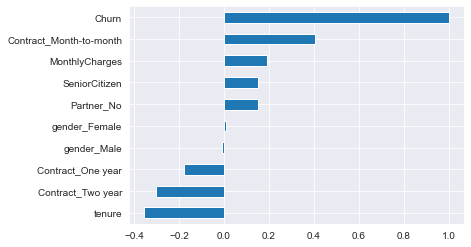

In [55]:

data.corr()["Churn"].head(10).sort_values().plot.barh()

In [56]:
log_model.coef_
#pd.DataFrame(np.array(log_model.coef_),np.array(X.columns).reshape(1,45),columns=["Coefficient"])

array([[ 2.19389915e-01, -5.90434931e-02,  2.72362820e-03,
         2.98747611e-04, -5.80408554e-02, -8.26608566e-02,
         5.20613900e-01, -2.41046377e-01, -4.20269235e-01,
        -1.03854005e-01, -3.68477067e-02,  3.91406857e-02,
        -1.79842398e-01,  1.07914900e-01, -2.48616612e-01,
         2.42404691e-01, -1.09185849e-01, -2.73920554e-01,
         9.76210820e-02, -1.09185849e-01, -1.29136945e-01,
        -1.74165101e-02, -1.09185849e-01, -1.40993530e-02,
         2.31740474e-01, -1.09185849e-01, -2.63256337e-01,
        -1.26328236e-01, -1.09185849e-01,  9.48123733e-02,
        -1.09148612e-01, -1.09185849e-01,  7.76327487e-02,
        -1.94229648e-01,  5.35279364e-02, -2.68501167e-01,
         1.07914900e-01,  1.98845552e-02, -3.55636340e-01,
         3.24120477e-01, -1.09185849e-01, -1.56447104e-01,
        -1.28663405e-01,  2.53738602e-01, -1.09329804e-01]])

# yellowbrick

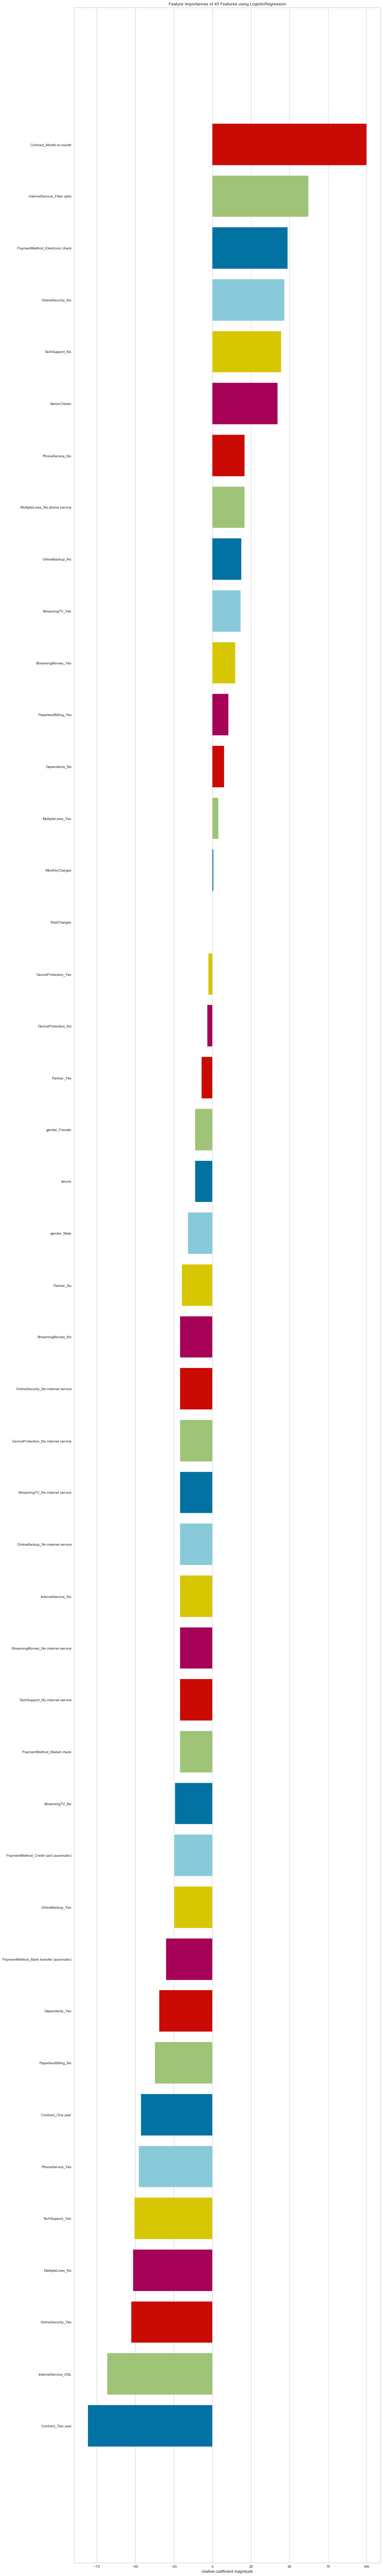

In [57]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
# Load the classification data set
visualizer = RadViz(size=(1080, 7200))
viz = FeatureImportances(log_model)
viz.fit(X, y)
viz.show()

In [58]:
a=np.array(X.columns).reshape(1,45)
a.shape

(1, 45)

# XGBOOST

In [104]:
data["TotalCharges"]=data["TotalCharges"].astype(float)

In [105]:
X=data.drop(["Churn"], axis=1)
y=data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

In [107]:
from xgboost import XGBClassifier

In [114]:
xgb_model =  XGBClassifier(n_estimators = 1500,  learning_rate = 0.001, max_depth= None, subsample =0.8)
xgb_model.fit(X_train, y_train,
             early_stopping_rounds=10,
             eval_set=[(X_test, y_test)],
             verbose=True)

y_pred = xgb_model.predict(X_test)

[0]	validation_0-error:0.22459
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.20540
[2]	validation_0-error:0.20611
[3]	validation_0-error:0.20896
[4]	validation_0-error:0.20967
[5]	validation_0-error:0.20967
[6]	validation_0-error:0.21109
[7]	validation_0-error:0.21038
[8]	validation_0-error:0.20896
[9]	validation_0-error:0.20611
[10]	validation_0-error:0.20540
[11]	validation_0-error:0.20398
[12]	validation_0-error:0.20398
[13]	validation_0-error:0.20469
[14]	validation_0-error:0.20469
[15]	validation_0-error:0.20682
[16]	validation_0-error:0.20469
[17]	validation_0-error:0.20327
[18]	validation_0-error:0.20540
[19]	validation_0-error:0.21038
[20]	validation_0-error:0.20540
[21]	validation_0-error:0.20824
[22]	validation_0-error:0.20682
[23]	validation_0-error:0.20896
[24]	validation_0-error:0.20611
[25]	validation_0-error:0.20398
[26]	validation_0-error:0.20469
[27]	validation_0-error:0.20469
Stopping. Best iteration:
[17]	validation_0-erro

In [115]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
X

In [110]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, X_test, y_test, cv=10)
print('Cross-Validation Accuracy Scores', scores.mean())

Cross-Validation Accuracy Scores 0.7640526849037487


In [64]:
scores

array([0.75886525, 0.79432624, 0.77304965, 0.80851064, 0.80141844,
       0.78723404, 0.73049645, 0.80714286, 0.78571429, 0.86428571])

Cross-Validation Accuracy Scores 0.7640526849037487


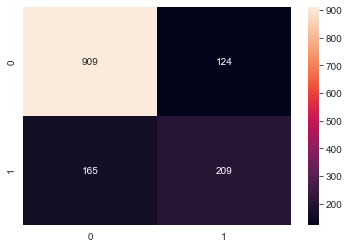

In [111]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, X_test, y_test, cv=10)
print('Cross-Validation Accuracy Scores', scores.mean())

cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [66]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix


array([[912, 121],
       [160, 214]], dtype=int64)

## KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
# pre processing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

In [69]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [70]:
a= pd.DataFrame(X_train,columns=X.columns)

In [71]:
knn_model = KNeighborsClassifier(weights='distance', n_neighbors=4, n_jobs=-1).fit(X_train, y_train)

In [72]:
y_pred = knn_model.predict(X_test)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1033
           1       0.49      0.51      0.50       374

    accuracy                           0.73      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.73      0.73      0.73      1407



In [74]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

# SMOTE

In [222]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [223]:
X=data.drop(["Churn"], axis=1)
y=data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

In [224]:
over = SMOTE(sampling_strategy=0.6)
under = RandomUnderSampler(sampling_strategy=0.7)

In [225]:

steps = [('o', over)]
pipeline = Pipeline(steps=steps)

In [226]:
# transform the dataset
X, y = pipeline.fit_resample( X, y)

In [227]:
y.value_counts()

0    5163
1    3097
Name: Churn, dtype: int64

In [141]:
#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

# Xgboost with Smote

In [228]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

In [229]:
xgb_model =  XGBClassifier(n_estimators = 1500,  learning_rate = 0.001, max_depth= None, subsample =0.8)
xgb_model.fit(X_train, y_train,
             early_stopping_rounds=10,
             eval_set=[(X_test, y_test)],
             verbose=True)

y_pred = xgb_model.predict(X_test)

[0]	validation_0-error:0.23123
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.21973
[2]	validation_0-error:0.22155
[3]	validation_0-error:0.21247
[4]	validation_0-error:0.21247
[5]	validation_0-error:0.21126
[6]	validation_0-error:0.20944
[7]	validation_0-error:0.21005
[8]	validation_0-error:0.21126
[9]	validation_0-error:0.20763
[10]	validation_0-error:0.20763
[11]	validation_0-error:0.20763
[12]	validation_0-error:0.20642
[13]	validation_0-error:0.20460
[14]	validation_0-error:0.20642
[15]	validation_0-error:0.20702
[16]	validation_0-error:0.20702
[17]	validation_0-error:0.20581
[18]	validation_0-error:0.20581
[19]	validation_0-error:0.20763
[20]	validation_0-error:0.20642
[21]	validation_0-error:0.20581
[22]	validation_0-error:0.20581
[23]	validation_0-error:0.20521
Stopping. Best iteration:
[13]	validation_0-error:0.20460



In [230]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1033
           1       0.72      0.75      0.73       619

    accuracy                           0.80      1652
   macro avg       0.78      0.79      0.78      1652
weighted avg       0.80      0.80      0.80      1652



# Deep Learning with Smoted Data

In [231]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=60,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=30,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)



In [232]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [233]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
207/207 [==============================] - 2s 3ms/step - loss: 0.6003 - accuracy: 0.7017 - val_loss: 0.5266 - val_accuracy: 0.7331
Epoch 2/600
207/207 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.7611 - val_loss: 0.7234 - val_accuracy: 0.5763
Epoch 3/600
207/207 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.7738 - val_loss: 0.5434 - val_accuracy: 0.7470
Epoch 4/600
207/207 [==============================] - 0s 2ms/step - loss: 0.4632 - accuracy: 0.7800 - val_loss: 0.5063 - val_accuracy: 0.7573
Epoch 5/600
207/207 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.7784 - val_loss: 0.5422 - val_accuracy: 0.6659
Epoch 6/600
207/207 [==============================] - 0s 2ms/step - loss: 0.4366 - accuracy: 0.7951 - val_loss: 0.5110 - val_accuracy: 0.7331
Epoch 7/600
207/207 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8046 - val_loss: 0.4175 - val_accuracy: 0.8063

Epoch 58/600
207/207 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.8180 - val_loss: 0.4097 - val_accuracy: 0.7942
Epoch 59/600
207/207 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8122 - val_loss: 0.3855 - val_accuracy: 0.8166
Epoch 60/600
207/207 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.8203 - val_loss: 1.0655 - val_accuracy: 0.6314
Epoch 00060: early stopping


In [234]:
predictions = model.predict_classes(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.50      0.63      1033
           1       0.50      0.85      0.63       619

    accuracy                           0.63      1652
   macro avg       0.68      0.68      0.63      1652
weighted avg       0.72      0.63      0.63      1652



# logistic Regression with Smoted Data

In [235]:

log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)

In [236]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1033
           1       0.75      0.74      0.75       619

    accuracy                           0.81      1652
   macro avg       0.80      0.80      0.80      1652
weighted avg       0.81      0.81      0.81      1652



In [237]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model, X_test, y_test, cv=10)
print('Cross-Validation Accuracy Scores', scores.mean())

Cross-Validation Accuracy Scores 0.8032603139832055


In [238]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[883, 150],
       [162, 457]], dtype=int64)

# Data Preprocessing with importance Features

In [240]:
df1 = pd.get_dummies(df,drop_first=True)

In [241]:
df1

,tenure,Churn,gender_Male,Contract_One year,Contract_Two year,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,0,0,1,0
1,34,0,1,1,0,1,0,0,0,0,1
2,2,1,1,0,0,1,0,0,0,0,1
3,45,0,1,1,0,0,0,0,0,0,0
4,2,1,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,1,1,0,1,0,0,0,0,1
7039,72,0,0,1,0,1,1,0,1,0,0
7040,11,0,0,0,0,0,0,0,0,1,0
7041,4,1,1,0,0,1,1,0,0,0,1


In [247]:
X=df1.drop(["Churn"], axis=1)
y=df1["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

over = SMOTE(sampling_strategy=0.6)
under = RandomUnderSampler(sampling_strategy=0.7)

In [248]:
steps = [('o', over)]
pipeline = Pipeline(steps=steps)


In [249]:
# transform the dataset
X, y = pipeline.fit_resample( X, y)

In [254]:
y.value_counts()

0    5163
1    3097
Name: Churn, dtype: int64

In [253]:
# I decided to best model is logistic model by scores. 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)

confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1033
           1       0.69      0.70      0.69       619

    accuracy                           0.77      1652
   macro avg       0.75      0.75      0.75      1652
weighted avg       0.77      0.77      0.77      1652



In [255]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model, X_test, y_test, cv=10)
print('Cross-Validation Accuracy Scores', scores.mean())


Cross-Validation Accuracy Scores 0.7663636363636364


In [256]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[833, 200],
       [184, 435]], dtype=int64)

# log_model

In [258]:
import pickle
pickle.dump(log_model, open("log_model", 'wb'))

In [259]:
model_lg = pickle.load(open("log_model","rb"))

# Xgbosst

In [260]:
xgb_model =  XGBClassifier(n_estimators = 1500,  learning_rate = 0.001, max_depth= None, subsample =0.8)
xgb_model.fit(X_train, y_train,
             early_stopping_rounds=10,
             eval_set=[(X_test, y_test)],
             verbose=True)

y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

[0]	validation_0-error:0.22881
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.22518
[2]	validation_0-error:0.22155
[3]	validation_0-error:0.22276
[4]	validation_0-error:0.21731
[5]	validation_0-error:0.21489
[6]	validation_0-error:0.21792
[7]	validation_0-error:0.22094
[8]	validation_0-error:0.21973
[9]	validation_0-error:0.22215
[10]	validation_0-error:0.21671
[11]	validation_0-error:0.21852
[12]	validation_0-error:0.21852
[13]	validation_0-error:0.21852
[14]	validation_0-error:0.22155
[15]	validation_0-error:0.21913
Stopping. Best iteration:
[5]	validation_0-error:0.21489

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1033
           1       0.71      0.72      0.72       619

    accuracy                           0.79      1652
   macro avg       0.77      0.77      0.77      1652
weighted avg       0.79      0.79      0.79      1652



In [263]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, X_test, y_test, cv=10)
print('Cross-Validation Accuracy Scores', scores.mean())

Cross-Validation Accuracy Scores 0.7669660460021906


In [264]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[850, 183],
       [172, 447]], dtype=int64)

In [270]:

pickle.dump(xgb_model, open("xgb_model", 'wb'))

model_xgb = pickle.load(open("xgb_model","rb"))

In [294]:
df

,gender,Contract,PhoneService,InternetService,PaymentMethod,tenure,Churn
0,Female,Month-to-month,No,DSL,Electronic check,1,0
1,Male,One year,Yes,DSL,Mailed check,34,0
2,Male,Month-to-month,Yes,DSL,Mailed check,2,1
3,Male,One year,No,DSL,Bank transfer,45,0
4,Female,Month-to-month,Yes,Fiber optic,Electronic check,2,1
...,...,...,...,...,...,...,...
7038,Male,One year,Yes,DSL,Mailed check,24,0
7039,Female,One year,Yes,Fiber optic,Credit card,72,0
7040,Female,Month-to-month,No,DSL,Electronic check,11,0
7041,Male,Month-to-month,Yes,Fiber optic,Mailed check,4,1


In [299]:
X

,tenure,gender_Male,Contract_One year,Contract_Two year,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,0,1,0
1,34,1,1,0,1,0,0,0,0,1
2,2,1,0,0,1,0,0,0,0,1
3,45,1,1,0,0,0,0,0,0,0
4,2,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
8255,37,0,0,0,0,0,0,1,0,0
8256,48,0,1,0,0,0,0,0,0,1
8257,31,0,0,0,1,1,0,0,1,0
8258,2,0,0,0,1,1,0,0,1,0


In [306]:
df

,gender,Contract,PhoneService,InternetService,PaymentMethod,tenure,Churn
0,Female,Month-to-month,No,DSL,Electronic check,1,0
1,Male,One year,Yes,DSL,Mailed check,34,0
2,Male,Month-to-month,Yes,DSL,Mailed check,2,1
3,Male,One year,No,DSL,Bank transfer,45,0
4,Female,Month-to-month,Yes,Fiber optic,Electronic check,2,1
...,...,...,...,...,...,...,...
7038,Male,One year,Yes,DSL,Mailed check,24,0
7039,Female,One year,Yes,Fiber optic,Credit card,72,0
7040,Female,Month-to-month,No,DSL,Electronic check,11,0
7041,Male,Month-to-month,Yes,Fiber optic,Mailed check,4,1


In [320]:
my_dict = {
    "tenure": 34,
    "gender": "Female",
    "Contract": "One year",
    "PhoneService": "Yes",
    "InternetService": "DSL",
    "PaymentMethod": "Mailed check"
    
    }
df2 = pd.DataFrame.from_dict([my_dict])

In [321]:
df2

,tenure,gender,Contract,PhoneService,InternetService,PaymentMethod
0,34,Female,One year,Yes,DSL,Mailed check


In [312]:
columns=X.columns
columns


Index(['tenure', 'gender_Male', 'Contract_One year', 'Contract_Two year',
       'PhoneService_Yes', 'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check'],
      dtype='object')

In [323]:
df2 = pd.get_dummies(df2).reindex(columns=columns, fill_value=0)
df2

,tenure,gender_Male,Contract_One year,Contract_Two year,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,34,0,1,0,1,0,0,0,0,1


In [285]:
X_test.loc[4710].values.reshape(10,)

array([20,  0,  1,  0,  1,  0,  1,  0,  0,  1], dtype=int64)

In [324]:
model_xgb.predict_proba(a)

array([[0.5027143 , 0.49728575]], dtype=float32)

In [289]:
a = pd.DataFrame(X_test.loc[4710].values.reshape(10,)).T

In [327]:
df1

,tenure,Churn,gender_Male,Contract_One year,Contract_Two year,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,0,0,1,0
1,34,0,1,1,0,1,0,0,0,0,1
2,2,1,1,0,0,1,0,0,0,0,1
3,45,0,1,1,0,0,0,0,0,0,0
4,2,1,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,1,1,0,1,0,0,0,0,1
7039,72,0,0,1,0,1,1,0,1,0,0
7040,11,0,0,0,0,0,0,0,0,1,0
7041,4,1,1,0,0,1,1,0,0,0,1


In [328]:
pickle.dump(df, open("final_df", 'wb'))

In [293]:
a

,0,1,2,3,4,5,6,7,8,9
0,20,0,1,0,1,0,1,0,0,1


# Knn

In [265]:
neighbors = np.arange(1, 7)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

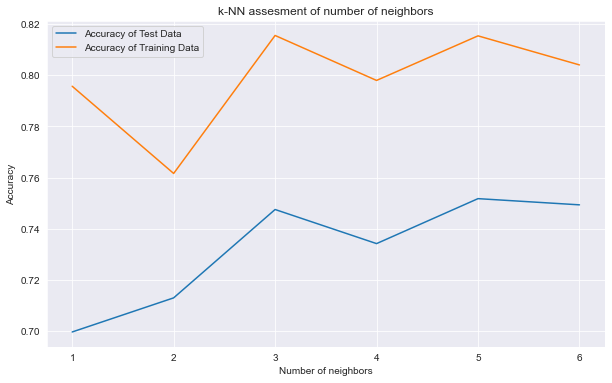

In [266]:
plt.figure(figsize=(10,6))
plt.title('k-NN assesment of number of neighbors')
plt.plot(neighbors, test_accuracy, label='Accuracy of Test Data')
plt.plot(neighbors, train_accuracy, label='Accuracy of Training Data')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [267]:
knn5 = KNeighborsClassifier(n_neighbors = 5)

knn5.fit(X_train,y_train)

y_pred = knn5.predict(X_test)

In [268]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1033
           1       0.66      0.71      0.68       619

    accuracy                           0.75      1652
   macro avg       0.74      0.74      0.74      1652
weighted avg       0.76      0.75      0.75      1652



In [180]:
table

Churn,0,1
tenure,,
1,233,380
2,115,123
3,106,94
4,93,83
5,69,64
...,...,...
68,91,9
69,87,8
70,108,11


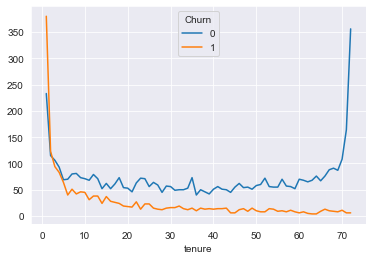

In [179]:
table=pd.crosstab(data.tenure,data.Churn)
table.plot()

In [143]:
data.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

In [144]:
table

NameError: name 'table' is not defined

In [86]:
feature_imp = pd.Series(xgb_model.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

NameError: name 'xgb_model' is not defined

#   RFE !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [87]:
from sklearn.feature_selection import RFE

In [88]:

selector = RFE(xgb_model, n_features_to_select=12, step=3,verbose=2  )
selector = selector.fit(X, y)
selector.support_


NameError: name 'xgb_model' is not defined

In [ ]:
selector = RFE(xgb_model, n_features_to_select=5, step=2,verbose=2  )

In [78]:
features = []
for i in list(enumerate(selector.support_.tolist())):
    if i[1] == True:
        features.append(i[0])
features

[1, 6, 7, 8, 13, 15, 16, 24, 29, 30, 32, 39]

In [79]:
X.columns[features]

Index(['tenure', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PhoneService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'TechSupport_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'InternetService_Fiber optic'],
      dtype='object')

In [80]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
feature_imp = pd.Series(xgb_model.feature_importances_,
                        index=X_train.columns[features]).sort_values(ascending=False)

ValueError: Length of passed values is 45, index implies 12.

In [81]:
feature_imp = pd.Series(xgb_model.feature_importances_,
                        index=X_train.columns[features]).sort_values(ascending=False)
plt.figure(figsize=(12,9))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

ValueError: Length of passed values is 45, index implies 12.

In [82]:
data.iloc[:,[1, 6, 7, 8, 39,4]].corr()["Churn"]

tenure                    -0.354049
gender_Male               -0.008545
Contract_Month-to-month    0.404565
Contract_One year         -0.178225
InternetService_DSL       -0.124141
Churn                      1.000000
Name: Churn, dtype: float64

In [ ]:
data

In [ ]:
features

In [ ]:
feature_imp.index

In [ ]:
feature_imp = pd.Series(xgb_model.feature_importances_[features],
                        index=X_train.columns[features]).sort_values(ascending=False)

In [ ]:
xgb_model =  XGBClassifier(n_estimators = 1500,  learning_rate = 0.05, max_depth= None, subsample =0.8)
xgb_model.fit(X_train.iloc[:,features], y_train,
             early_stopping_rounds=10,
             eval_set=[(X_test.iloc[:,features], y_test)],
             verbose=True)

y_pred = xgb_model.predict(X_test.iloc[:,features])

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, X_test, y_test, cv=10)
print('Cross-Validation Accuracy Scores', scores.mean())

cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
y.value_counts()

In [ ]:
X_train.iloc[:,features]